In [1]:
import warnings
warnings.filterwarnings('ignore')

In [17]:
from datetime import datetime
import itertools

import pandas as pd
import pandas_datareader.data as web
from pykalman import KalmanFilter
import pywt

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sns.set_style('whitegrid')
idx = pd.IndexSlice

In [4]:
DATA_STORE = 'C:/Users/86155/Machine Learning for Algorithmic Trading/data/assets.h5'

In [5]:
with pd.HDFStore(DATA_STORE) as store:
    sp500 = store['sp500/stooq'].loc['2009': '2010', 'close']

In [6]:
sp500

Date
2009-01-02     931.80
2009-01-05     927.45
2009-01-06     934.70
2009-01-07     906.65
2009-01-08     909.73
               ...   
2010-12-27    1257.54
2010-12-28    1258.51
2010-12-29    1259.78
2010-12-30    1257.88
2010-12-31    1257.64
Name: close, Length: 504, dtype: float64

In [7]:
kf = KalmanFilter(transition_matrices = [1],
                  observation_matrices = [1],
                  initial_state_mean = 0,
                  initial_state_covariance = 1,
                  observation_covariance=1,
                  transition_covariance=.01)

In [8]:
state_means, _ = kf.filter(sp500)

In [9]:
type(sp500)

pandas.core.series.Series

In [10]:
sp500.to_frame('close')

,close
Date,
2009-01-02,931.80
2009-01-05,927.45
2009-01-06,934.70
2009-01-07,906.65
2009-01-08,909.73
...,...
2010-12-27,1257.54
2010-12-28,1258.51
2010-12-29,1259.78


In [11]:
sp500

Date
2009-01-02     931.80
2009-01-05     927.45
2009-01-06     934.70
2009-01-07     906.65
2009-01-08     909.73
               ...   
2010-12-27    1257.54
2010-12-28    1258.51
2010-12-29    1259.78
2010-12-30    1257.88
2010-12-31    1257.64
Name: close, Length: 504, dtype: float64

In [12]:
sp500.rolling(window = 2).mean()

Date
2009-01-02         NaN
2009-01-05     929.625
2009-01-06     931.075
2009-01-07     920.675
2009-01-08     908.190
                ...   
2010-12-27    1257.155
2010-12-28    1258.025
2010-12-29    1259.145
2010-12-30    1258.830
2010-12-31    1257.760
Name: close, Length: 504, dtype: float64

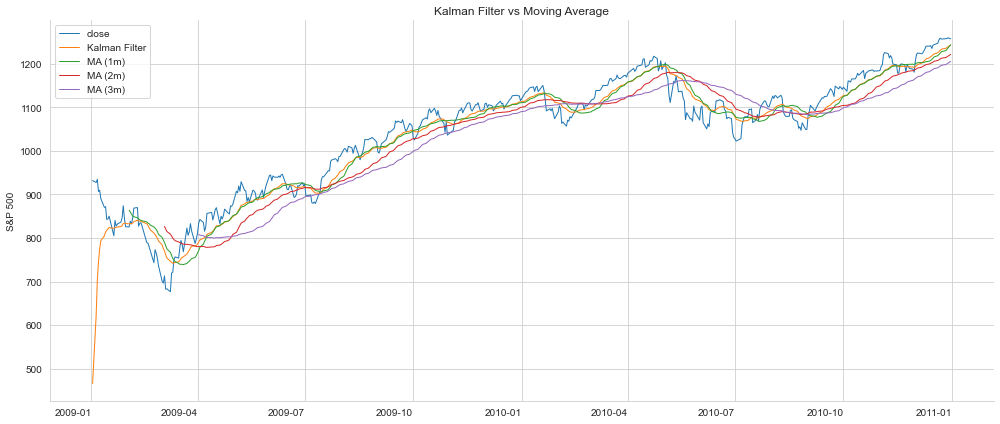

In [13]:
sp500_smoothed = sp500.to_frame('close')
sp500_smoothed['Kalman Filter'] = state_means
for months in [1,2,3]:
    sp500_smoothed[f'MA ({months}m)'] = sp500.rolling(window=months*21).mean()

ax = sp500_smoothed.plot(title='Kalman Filter vs Moving Average', figsize=(14,6), lw=1, rot=0)
ax.set_xlabel('')
ax.set_ylabel('S&P 500')
plt.tight_layout()
sns.despine();

In [19]:
wavelet = pywt.Wavelet('db6')
phi, psi, x = wavelet.wavefun(level=5)
df = pd.DataFrame({'$\phi$': phi, '$\psi$': psi}, index=x)
df.plot(title='Daubechies', subplots=True, layout=(1, 2), figsize=(14, 4), lw=2, rot=0)
plt.tight_layout()
sns.despine()

AttributeError: module 'pywt' has no attribute 'Wavelet'

In [18]:
pywt.families(short=False)

AttributeError: module 'pywt' has no attribute 'families'